<a href="https://colab.research.google.com/github/cyruskimani/Hass-Consulting-Housing-Dataset-Analysis-with-Regression/blob/main/Week_7_Moringa_Core_IP_Cyrus_Kimani_Quantile_Regression_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with EDA: Hass Consulting Prediction Model.

## Defining The Question

### a) Specifying the Question.

Overview 

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.

Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 



### b) Defining the Metrics for Success.

The Supervised Learning Model will be considered successful if an accurate prediction of price for houses can be made from the provided data.

*Inputs:*

* Features of the housing dataset.

*Metrics:*

* Accuracy of Model should be >= 80%
* RSME score should remain at a minimum.


### c) Understanding the context.

It is impotrant for Hass Consulting to identify the facors that affect the price of houses. Give recommendations based on the results from each of the regression models and their appropriateness in predicting the price.

### d) Recording the Experimental Design.

1. Defining the question, context and metrics for success.
2. Loading and exploration of the dataset.
3. Data cleaning.
4. Finding and dealing with outliers and anomalies.
5. EDA: Univariate, BivarIate and Multivariate analysis.
6. Reression models.


The experimental design for this project will be composed of regression analysis with incoporating categorical variables and checking for multicollinerity as follows

Regression:

* Multiple Linear Regresion.
* Quantile Regression.
* Ridge Regression.
* Lasso Regression.
* Elastic Net Regression.

7. Recommendations.
8. Challenging the solution.



### e) Data Relevance.

Data relevance will depend on the following factors:
* Accuracy of the data in predicting the price of houses.
* Reliability of the data source.
* Absence of bias in the training data.
* Sufficient size of data.

The dataset for the prediction model can be accessed at:
* http://bit.ly/IndependentProjectWeek7Dataset.

## Loading the Datasets.

In [1]:
# Importing Libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
import scipy as sp
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import math
from scipy.stats import ttest_ind
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading and previewing the Housing Dataset.

housing = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

In [3]:
# Checking Columns and Datatypes in the Housing Dataset.
print('Information of the Housing Dataset')
housing.info()

Information of the Housing Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           

*The Housing dataset contains 21613 rows, 20 columns and the respective datatypes for each column as shown above.*

In [4]:
# Columns of the housing dataset.
print('The columns in the dataset are:')
housing.columns

The columns in the dataset are:


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# checking the number of records in the data.

print('The shape of the dataset',housing.shape)

The shape of the dataset (21613, 20)


The housing dataframe has 21613 rows and 20 columns.

In [6]:
# Previewing the top of the dataset

housing.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [7]:
# Previewing the tail of the dataset.

housing.tail(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [8]:
# Checking the datatypes of each column.

print('The datatypes of each column are as follows')
housing.dtypes

The datatypes of each column are as follows


id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Data Cleaning.

In [9]:
# Checking for null values.

housing.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

*No null values were found*

In [10]:
# Checking for duplicates.

print('Number of duplicated records = ',housing.duplicated().sum())

Number of duplicated records =  3


In [11]:
# Dropping duplicates.

print('Shape of dataframe before dropping duplicates = ',housing.shape)
housing.drop_duplicates(inplace=True)
print('Shape of dataframe after dropping duplicates = ',housing.shape)

Shape of dataframe before dropping duplicates =  (21613, 20)
Shape of dataframe after dropping duplicates =  (21610, 20)


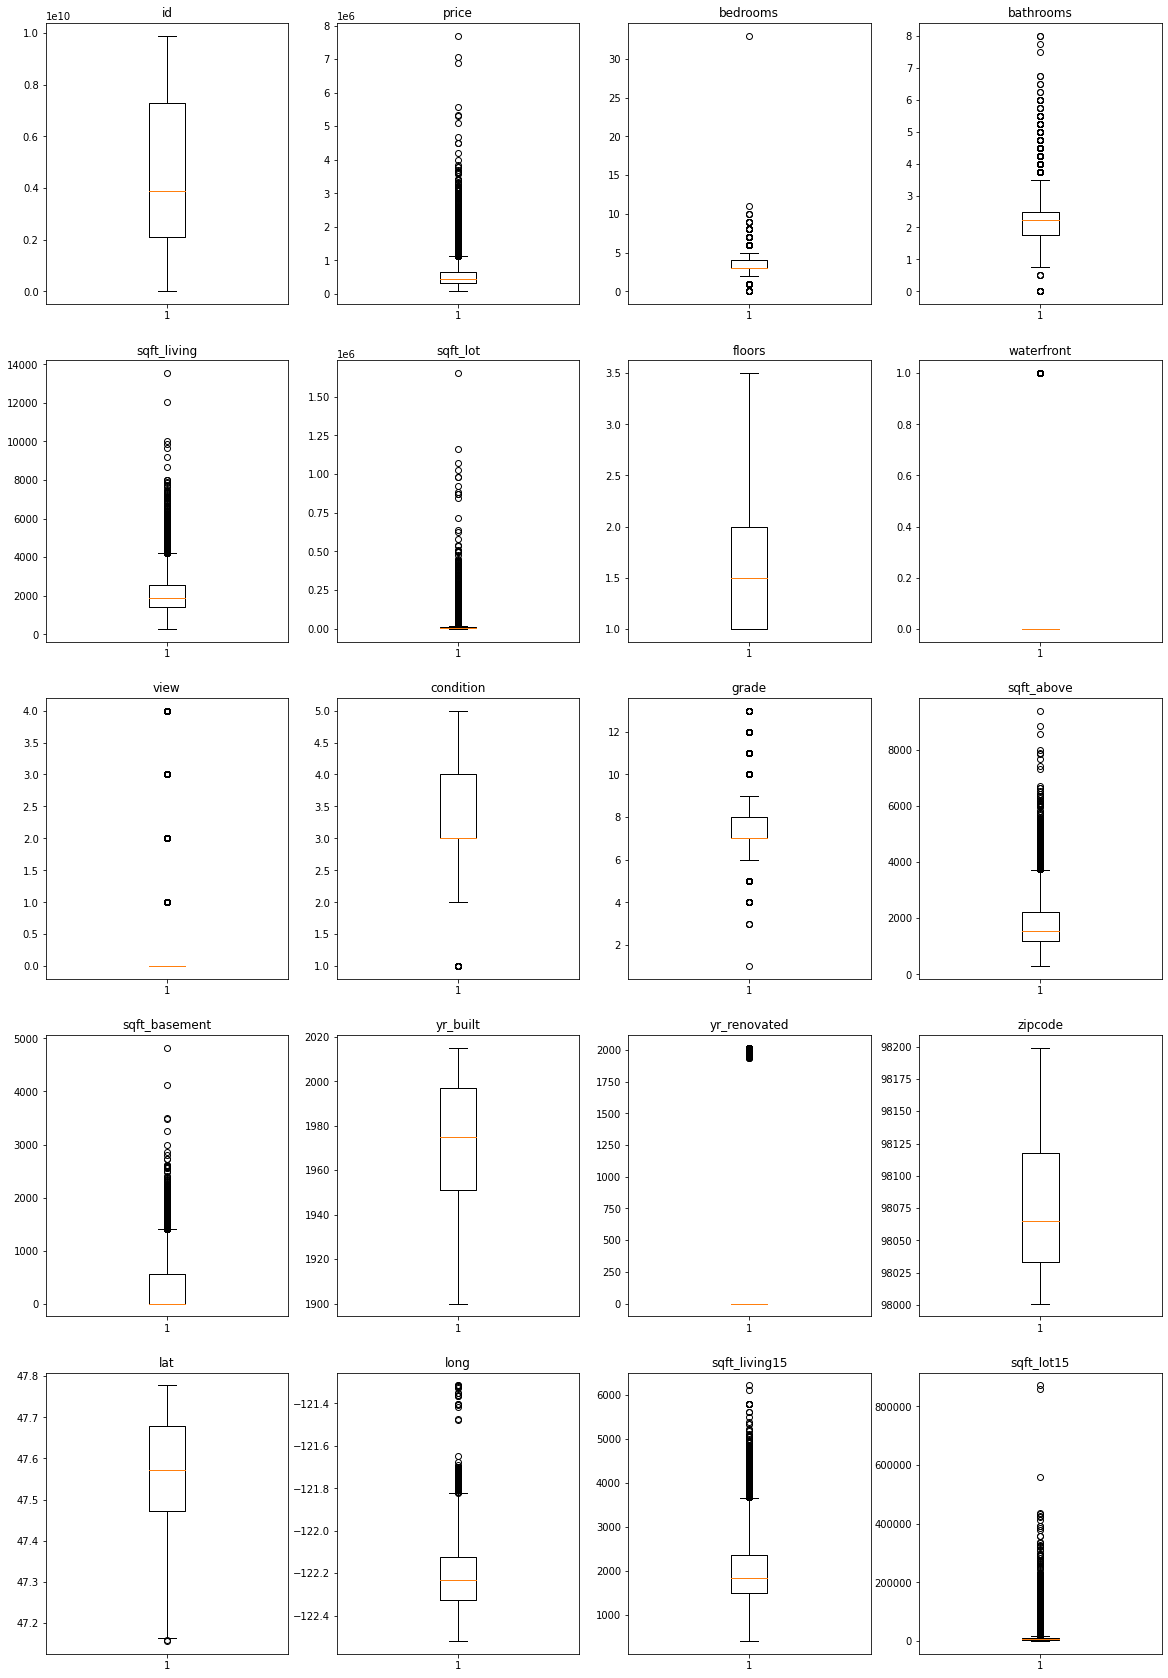

In [12]:
# Outliers

columns = {'id': 1, 'price': 2, 'bedrooms': 3, 'bathrooms': 4, 'sqft_living': 5,
           'sqft_lot': 6,'floors': 7, 'waterfront': 8, 'view': 9, 'condition': 10,
           'grade': 11, 'sqft_above': 12,'sqft_basement': 13, 'yr_built': 14,
           'yr_renovated':15, 'zipcode': 16, 'lat': 17, 'long': 18,'sqft_living15': 19,
           'sqft_lot15': 20}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for names,i in columns.items():
  plt.subplot(5,4,i)
  plt.boxplot(housing[names])
  plt.title(names)

plt.show()

In [13]:
#IQR
# Define quantiles

Q1 = housing.quantile(0.10)
Q3 = housing.quantile(0.90)
 
# Interquartile range (IQR) 
IQR = Q3 - Q1 
  
print('Shape of dataframe before removing outliers', housing.shape)

# Removing outliers using IQR
housing_1 = housing[~((housing < (Q1 - 1.5 * IQR)) | (housing > (Q3 + 1.5 * IQR))).any(axis=1)]

print('Shape of dataframe after removing outliers', housing_1.shape)


Shape of dataframe before removing outliers (21610, 20)
Shape of dataframe after removing outliers (17646, 20)


In [14]:
# Checking for anomalies in the bedrooms, bathrooms and floors

print('Unique records in bedrooms',housing_1['bedrooms'].unique())
print('Unique records in bathrooms',housing_1['bathrooms'].unique())
print('Unique records in floors',housing_1['floors'].unique())
housing_1.shape

Unique records in bedrooms [3 2 4 5 1 6 7 0]
Unique records in bathrooms [1.   3.   2.   2.25 1.5  2.5  1.75 2.75 4.   3.25 3.5  0.75 4.25 3.75
 4.5  4.75 1.25 0.5  5.   5.25 0.  ]
Unique records in floors [1.  2.  1.5 3.  2.5 3.5]


(17646, 20)

In [15]:
# converting variables from float to int

housing_1['bathrooms'] = housing_1['bathrooms'].astype(int)
housing_1['floors'] = housing_1['floors'].astype(int)
housing_1['id'] = housing_1['id'].astype(str)
housing_1['zipcode'] = housing_1['zipcode'].astype(str)
bath=('Unique records in bathrooms',housing_1['bathrooms'].unique())
print('Unique records in floors',housing_1['floors'].unique())

Unique records in floors [1 2 3]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [16]:
# Dropping irrelevant columns.

df = housing_1.drop(columns=['id','sqft_living15','sqft_lot15'])
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233


## Exploratory Data Analysis.

### Univariate Analysis.

In [17]:
# Obtaining a description of the dataset.

df.describe(include='all')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,1.764600e+04,17646.000000,17646.000000,17646.000000,17646.000000,17646.000000,17646.0,17646.0,17646.000000,17646.000000,17646.000000,17646.000000,17646.000000,17646.0,17646,17646.000000,17646.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98052,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539,NaN,NaN
mean,4.753674e+05,3.326533,1.680324,1940.076958,8383.417375,1.443387,0.0,0.0,3.412388,7.519381,1696.581945,243.495013,1972.350844,0.0,NaN,47.559938,-122.217337
std,2.395483e+05,0.869316,0.663150,766.521880,6278.690399,0.555502,0.0,0.0,0.644881,1.048684,733.904079,385.297033,29.163404,0.0,NaN,0.139769,0.132997
min,8.000000e+04,0.000000,0.000000,370.000000,520.000000,1.000000,0.0,0.0,2.000000,3.000000,370.000000,0.000000,1900.000000,0.0,NaN,47.155900,-122.502000
25%,3.050000e+05,3.000000,1.000000,1370.000000,4961.250000,1.000000,0.0,0.0,3.000000,7.000000,1160.000000,0.000000,1953.000000,0.0,NaN,47.467000,-122.327000
50%,4.247250e+05,3.000000,2.000000,1810.000000,7299.500000,1.000000,0.0,0.0,3.000000,7.000000,1490.000000,0.000000,1976.000000,0.0,NaN,47.571200,-122.232000
75%,5.827250e+05,4.000000,2.000000,2380.000000,9672.000000,2.000000,0.0,0.0,4.000000,8.000000,2090.000000,460.000000,1999.000000,0.0,NaN,47.681000,-122.134000


In [18]:
#Measures of central tendency and dispersion for price.

print(f'Min: {df.price.min()}')
print(f'Q1: {df.price.quantile(.25)}')
print(f'Q2: {df.price.quantile(.50)}')
print(f'Q3: {df.price.quantile(.75)}')
print(f'Max: {df.price.max()}')
print('***************************')

print(f'Mean: {df.price.mean()}')
print(f'Median: {df.price.median()}')
print(f'Mode: {df.price.mode().values[0]}')
print('****************************')

print(f'Skew: {df.price.skew()}')
print(f'Kurtosis: {df.price.kurt()}')

Min: 80000.0
Q1: 305000.0
Q2: 424725.0
Q3: 582725.0
Max: 1850000.0
***************************
Mean: 475367.3570214213
Median: 424725.0
Mode: 350000.0
****************************
Skew: 1.6510501177387513
Kurtosis: 4.230928144559572


In [19]:
#Measures of central tendency and dispersion for number of bedrooms.

print(f'Min: {df.bedrooms.min()}')
print(f'Q1: {df.bedrooms.quantile(.25)}')
print(f'Q2: {df.bedrooms.quantile(.50)}')
print(f'Q3: {df.bedrooms.quantile(.75)}')
print(f'Max: {df.bedrooms.max()}')
print('***************************')

print(f'Mean: {df.bedrooms.mean()}')
print(f'Median: {df.bedrooms.median()}')
print(f'Mode: {df.bedrooms.mode().values[0]}')
print('****************************')

print(f'Skew: {df.bedrooms.skew()}')
print(f'Kurtosis: {df.bedrooms.kurt()}')

Min: 0
Q1: 3.0
Q2: 3.0
Q3: 4.0
Max: 7
***************************
Mean: 3.326532925308852
Median: 3.0
Mode: 3
****************************
Skew: 0.3224300184299302
Kurtosis: 0.646593723429616


In [20]:
#Measures of central tendency and dispersion for number of bedrooms.

print(f'Min: {df.bathrooms.min()}')
print(f'Q1: {df.bathrooms.quantile(.25)}')
print(f'Q2: {df.bathrooms.quantile(.50)}')
print(f'Q3: {df.bathrooms.quantile(.75)}')
print(f'Max: {df.bathrooms.max()}')
print('***************************')

print(f'Mean: {df.bathrooms.mean()}')
print(f'Median: {df.bathrooms.median()}')
print(f'Mode: {df.bathrooms.mode().values[0]}')
print('****************************')

print(f'Skew: {df.bathrooms.skew()}')
print(f'Kurtosis: {df.bathrooms.kurt()}')

Min: 0
Q1: 1.0
Q2: 2.0
Q3: 2.0
Max: 5
***************************
Mean: 1.6803241527825004
Median: 2.0
Mode: 2
****************************
Skew: 0.6089561373207198
Kurtosis: 0.45718980649874297


In [21]:
#Measures of central tendency and dispersion in sqft living.

print(f'Min: {df.sqft_living.min()}')
print(f'Q1: {df.sqft_living.quantile(.25)}')
print(f'Q2: {df.sqft_living.quantile(.50)}')
print(f'Q3: {df.sqft_living.quantile(.75)}')
print(f'Max: {df.sqft_living.max()}')
print('***************************')

print(f'Mean: {df.sqft_living.mean()}')
print(f'Median: {df.sqft_living.median()}')
print(f'Mode: {df.sqft_living.mode().values[0]}')
print('****************************')

print(f'Skew: {df.sqft_living.skew()}')
print(f'Kurtosis: {df.sqft_living.kurt()}')

Min: 370
Q1: 1370.0
Q2: 1810.0
Q3: 2380.0
Max: 6160
***************************
Mean: 1940.0769579508103
Median: 1810.0
Mode: 1400
****************************
Skew: 0.8806378614687053
Kurtosis: 0.9099821658720919


In [22]:
#Measures of central tendency and dispersion in sqft lot.

print(f'Min: {df.sqft_lot.min()}')
print(f'Q1: {df.sqft_lot.quantile(.25)}')
print(f'Q2: {df.sqft_lot.quantile(.50)}')
print(f'Q3: {df.sqft_lot.quantile(.75)}')
print(f'Max: {df.sqft_lot.max()}')
print('***************************')

print(f'Mean: {df.sqft_lot.mean()}')
print(f'Median: {df.sqft_lot.median()}')
print(f'Mode: {df.sqft_lot.mode().values[0]}')
print('****************************')

print(f'Skew: {df.sqft_lot.skew()}')
print(f'Kurtosis: {df.sqft_lot.kurt()}')

Min: 520
Q1: 4961.25
Q2: 7299.5
Q3: 9672.0
Max: 48351
***************************
Mean: 8383.417375042503
Median: 7299.5
Mode: 5000
****************************
Skew: 2.7674689025472805
Kurtosis: 10.238439884490193


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbefcd53748>,
      dtype=object)

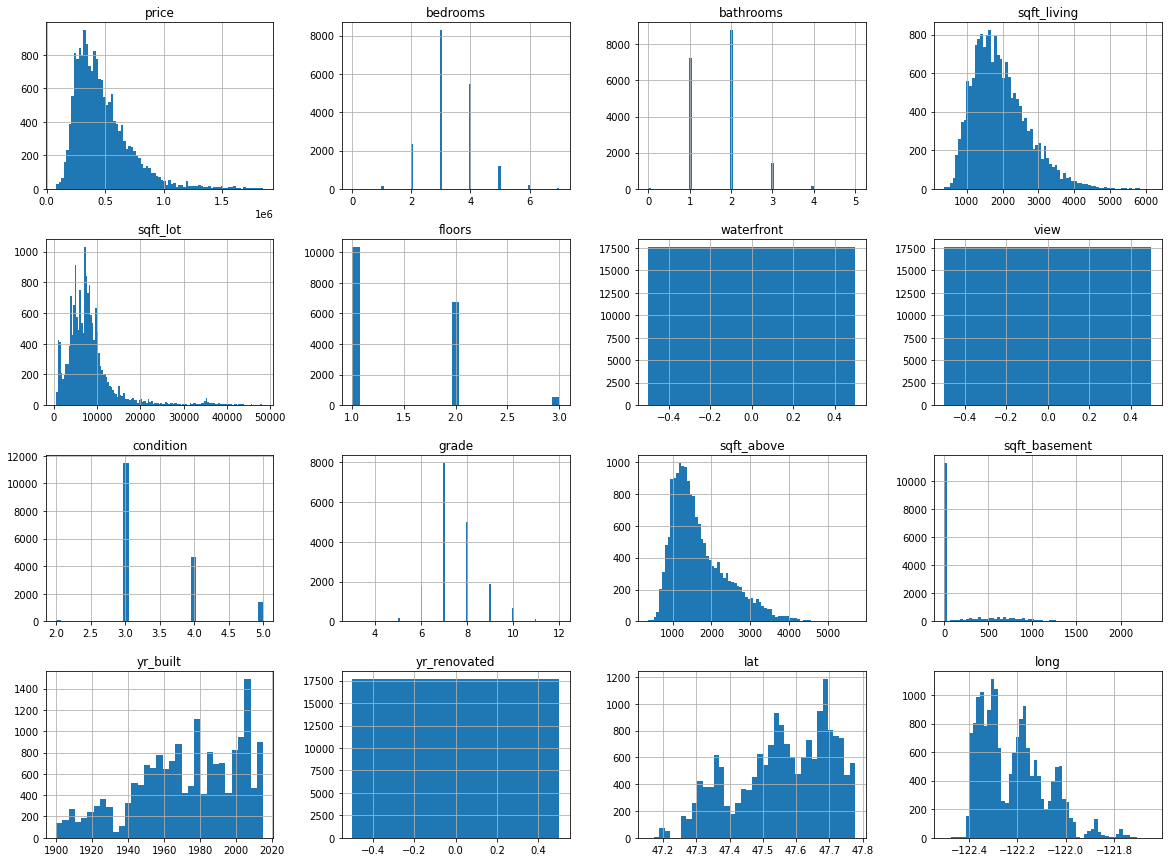

In [23]:
# Checking the distribution of the data

df.hist(bins='auto', figsize=[20,15])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


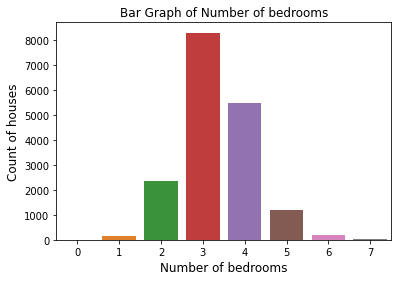

In [24]:
# Visualizing the number of bedrooms per house.

sns.countplot('bedrooms', data=df)
plt.xlabel('Number of bedrooms', fontsize=12)
plt.ylabel('Count of houses', fontsize=12)
plt.title('Bar Graph of Number of bedrooms', fontsize=12)
plt.show()

Most of the houses had 3 and 4 bedrooms, fewer houses had 1, 2, 5 and 6 or more bedrooms

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


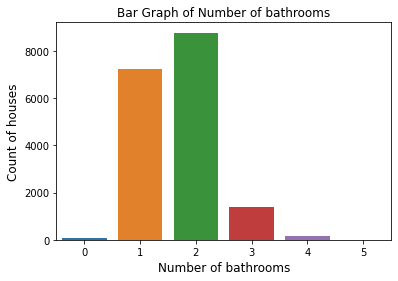

In [25]:
# Visualizing the number of bathrooms per house.

sns.countplot('bathrooms', data=df)
plt.xlabel('Number of bathrooms', fontsize=12)
plt.ylabel('Count of houses', fontsize=12)
plt.title('Bar Graph of Number of bathrooms', fontsize=12)
plt.show()

Most of the houses had 1 or 2 bathrooms, fewer houses had 0, 3, 4 or 5 bathrooms

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


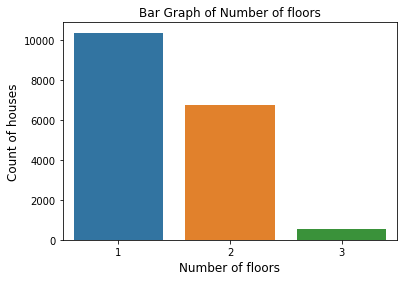

In [26]:
# Visualizing the number of floors per house.

sns.countplot('floors', data=df)
plt.xlabel('Number of floors', fontsize=12)
plt.ylabel('Count of houses', fontsize=12)
plt.title('Bar Graph of Number of floors', fontsize=12)
plt.show()

Most of the house were on 1 floor, followed by 2 and 3 floors.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


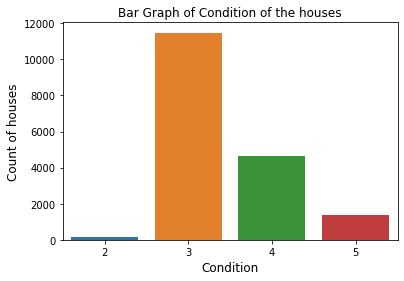

In [27]:
# Visualizing the condition of the house.

sns.countplot('condition', data=df)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Count of houses', fontsize=12)
plt.title('Bar Graph of Condition of the houses', fontsize=12)
plt.show()

Most of the houses were in condition 3, followed by 4,5, and 2 in that order.

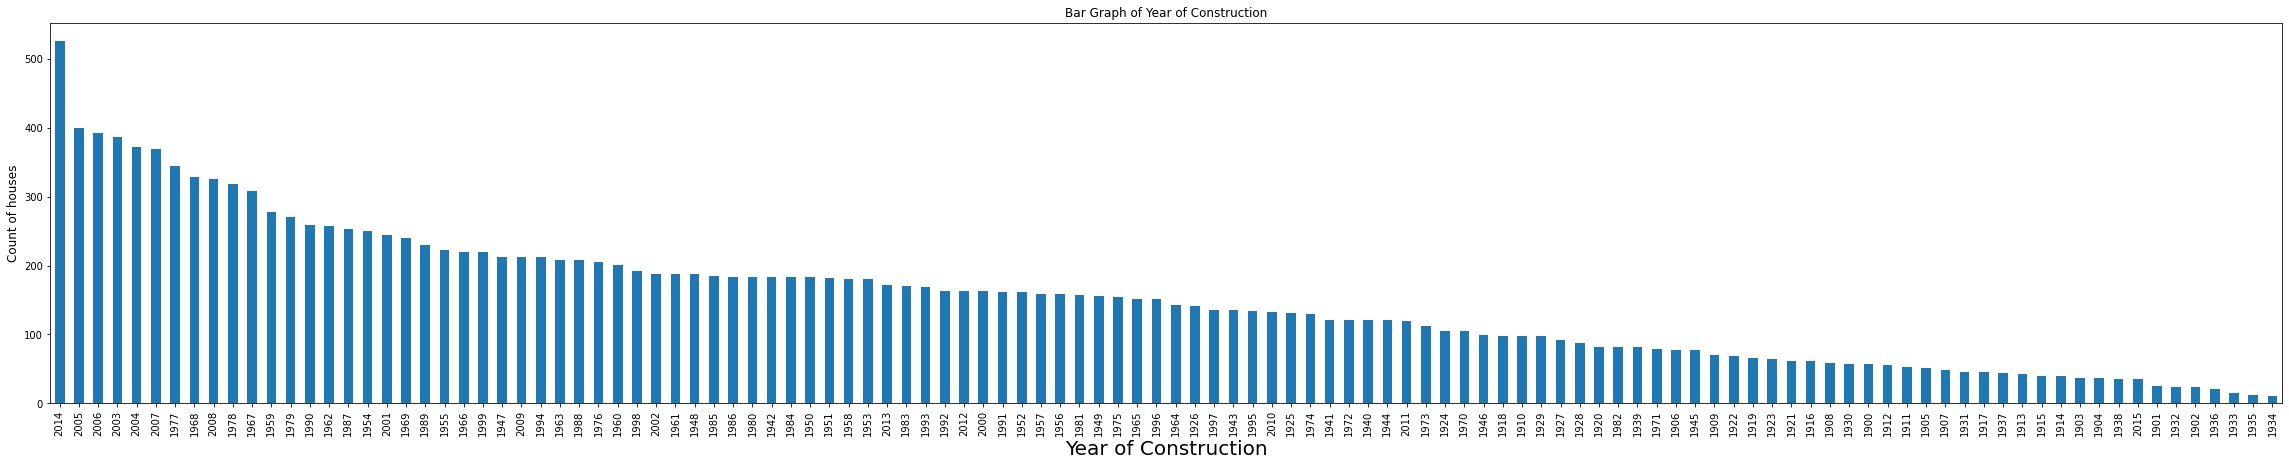

In [28]:
# Visualizing the year of construction.

plt.figure(figsize = (40,7))
df['yr_built'].value_counts().plot(kind='bar',rot=90)
plt.xlabel('Year of Construction', fontsize=20)
plt.ylabel('Count of houses', fontsize=12)
plt.title('Bar Graph of Year of Construction', fontsize=12)
plt.show()

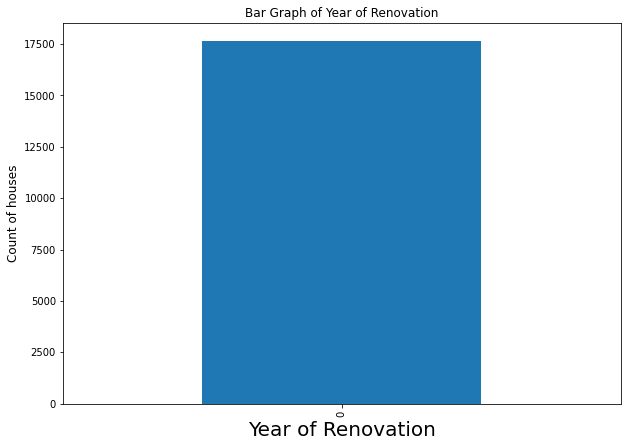

In [29]:
# Visualizing the year of renovation.

plt.figure(figsize = (10,7))
df['yr_renovated'].value_counts().plot(kind='bar',rot=90)
plt.xlabel('Year of Renovation', fontsize=20)
plt.ylabel('Count of houses', fontsize=12)
plt.title('Bar Graph of Year of Renovation', fontsize=12)
plt.show()

All the houses in the working dataset have no record of renovation.

### Bivariate Analysis.

In [30]:
# Generating correlation coefficients
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
price,1.000000,0.322014,0.429047,0.642431,0.110137,0.263392,NaN,NaN,0.038813,0.651247,0.564541,0.202749,0.085955,NaN,0.417524,0.077670
bedrooms,0.322014,1.000000,0.447397,0.619207,0.166746,0.143084,NaN,NaN,0.025255,0.350515,0.501774,0.276104,0.181724,NaN,-0.034935,0.170774
bathrooms,0.429047,0.447397,1.000000,0.644787,0.038844,0.509092,NaN,NaN,-0.156338,0.558297,0.590868,0.157288,0.509850,NaN,0.005757,0.228405
sqft_living,0.642431,0.619207,0.644787,1.000000,0.274303,0.363102,NaN,NaN,-0.082100,0.723813,0.868999,0.334183,0.374955,NaN,0.033188,0.303082
sqft_lot,0.110137,0.166746,0.038844,0.274303,1.000000,-0.158853,NaN,NaN,0.064491,0.175157,0.251130,0.067360,-0.003668,NaN,-0.062672,0.279023
floors,0.263392,0.143084,0.509092,0.363102,-0.158853,1.000000,NaN,NaN,-0.327087,0.495413,0.530052,-0.287263,0.636742,NaN,0.013000,0.188432
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,0.038813,0.025255,-0.156338,-0.082100,0.064491,-0.327087,NaN,NaN,1.000000,-0.181811,-0.186744,0.192374,-0.403619,NaN,0.000124,-0.112446
grade,0.651247,0.350515,0.558297,0.723813,0.175157,0.495413,NaN,NaN,-0.181811,1.000000,0.730995,0.047595,0.503944,NaN,0.103533,0.247833


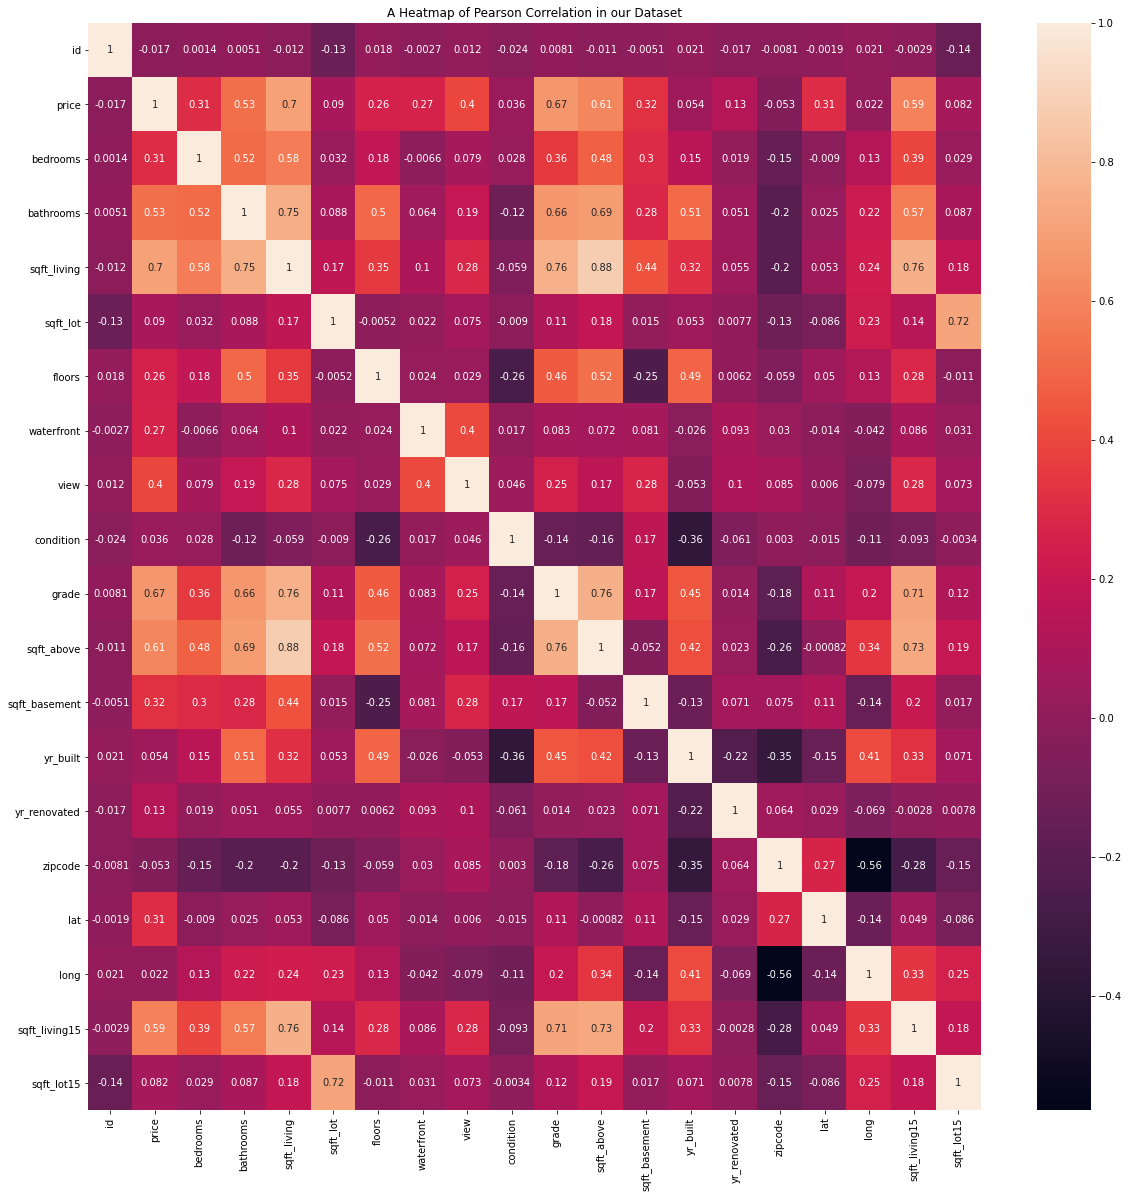

In [31]:
# Plotting a heatmap for the dataset

a = housing.corr() 
plt.figure(figsize = (20,20))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset')
plt.show()
plt.show()

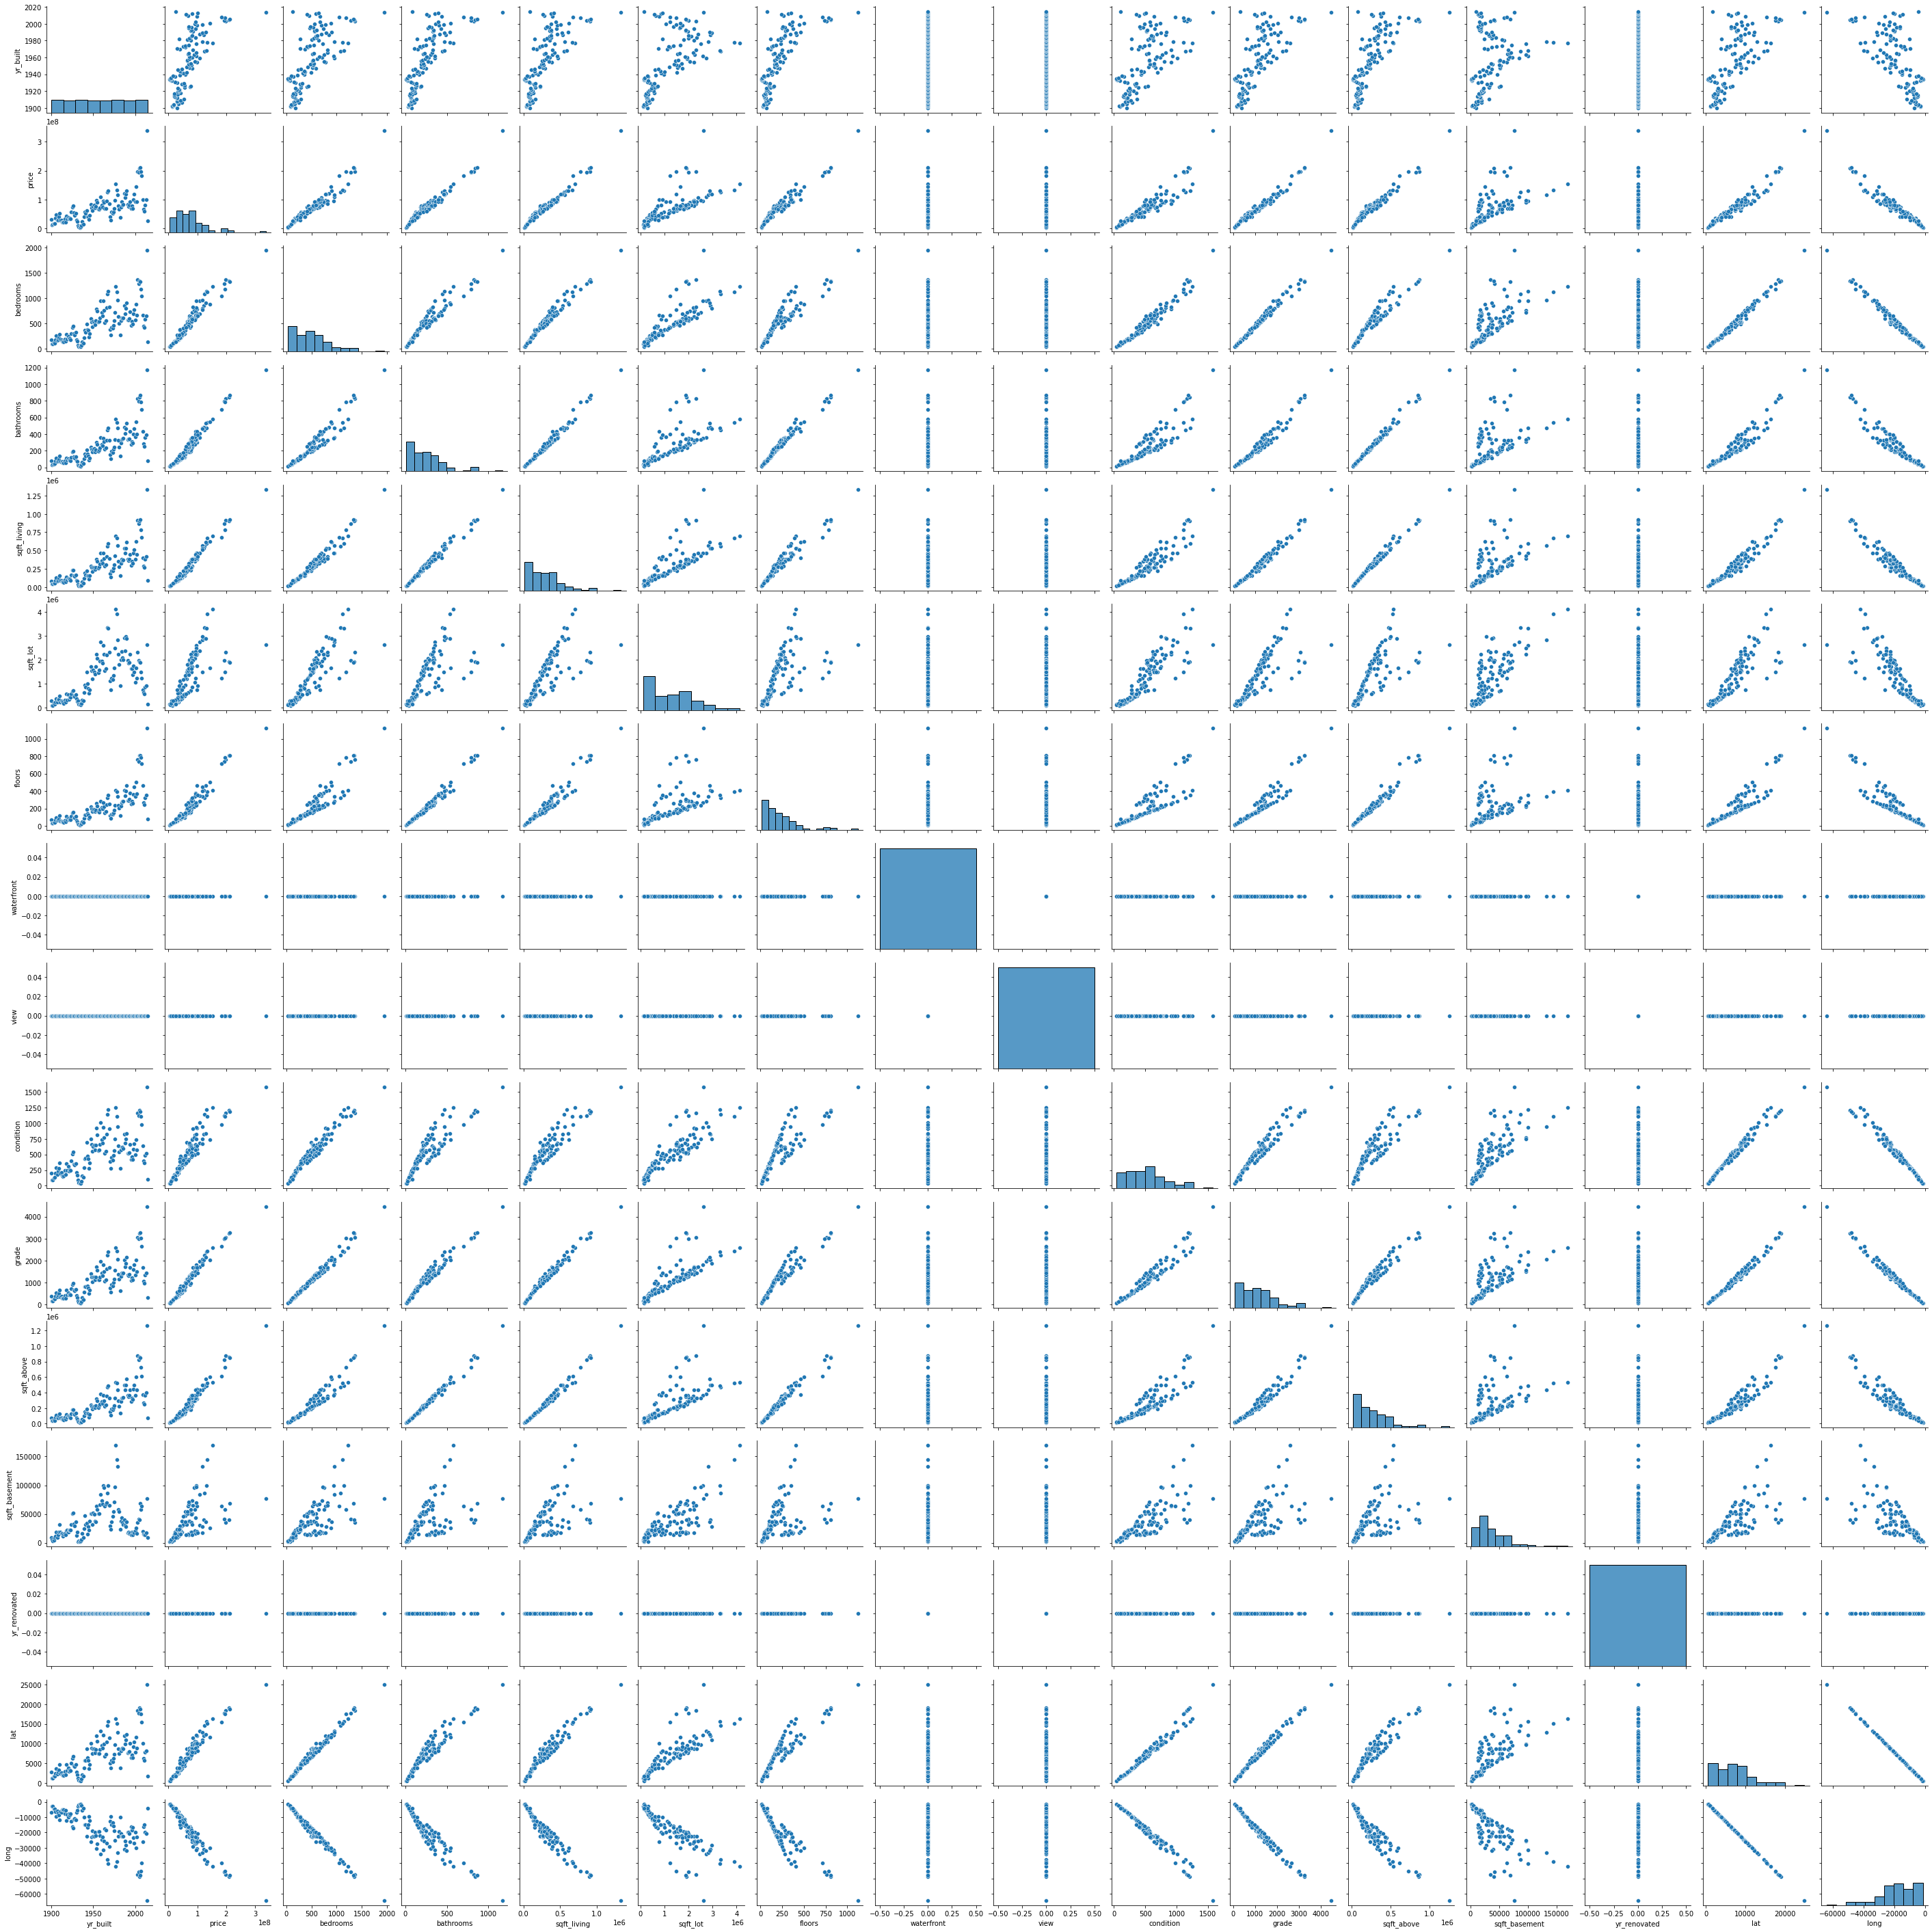

In [85]:
# Ploting the bivariate summaries and recording our observations
# scatterplot

sns.pairplot(df)
plt.show()

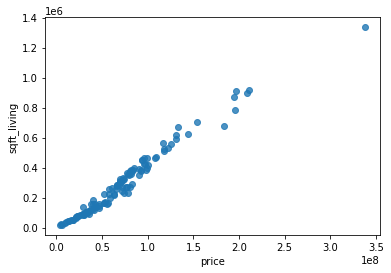

In [40]:
# Scatter plot of price and sqft living.

sns.regplot(x = df['price'], y = df['sqft_living'], fit_reg=False)
plt.show()

The price of houses is directly proportional to the size of the living room.

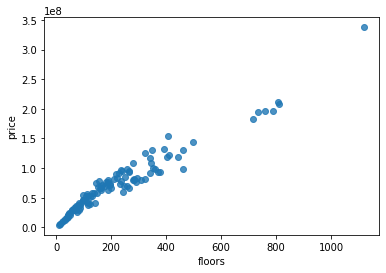

In [84]:
# Scatter plot of number of floors and price.

sns.regplot(x = df['floors'], y = df['price'], fit_reg=False)
plt.show()

There was a directly proportional relationship between the number of floors and price.

Text(0.5, 1.0, 'Price Vs Year built')

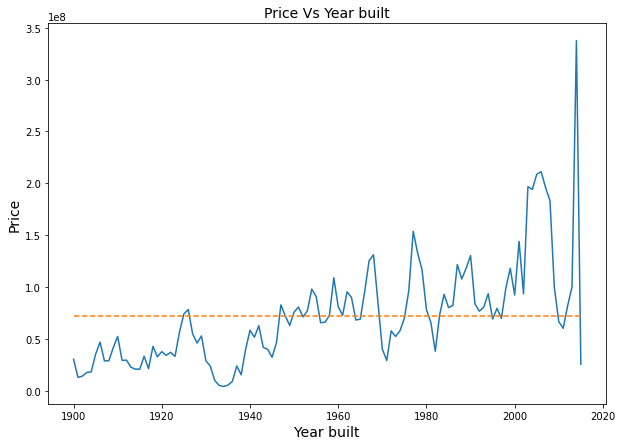

In [42]:
# Ploting a line graph of year of construction against price.

# Grouping by year built.
df=df.groupby(['yr_built']).sum().reset_index()
x=df['yr_built']
y=df['price']
fig, ax = plt.subplots(sharex='col', sharey='row', figsize=[10,7])
ax.plot(x,y)

# Calculate the simple average of the data
y_mean = [np.mean(y)]*len(x)
ax.plot(x,y_mean, linestyle='--')
ax.set_xlabel('Year built', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('Price Vs Year built', fontsize = 14)

The price of houses has an increasing trend in compaison to the year of construction.

Text(0.5, 1.0, 'Price Vs Year Renovated')

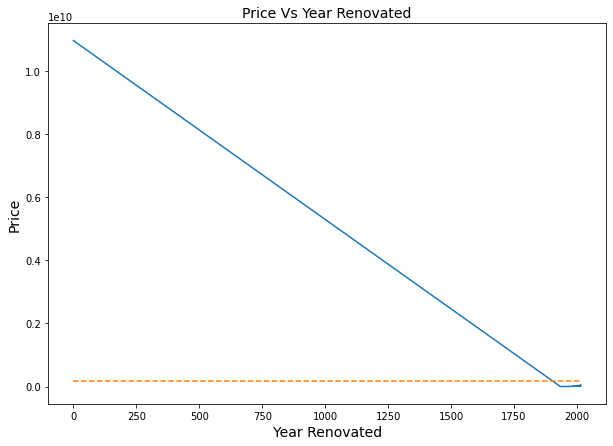

In [43]:
# Ploting a line graph of year of renovation against price.

# Grouping by year built.
housing=housing.groupby(['yr_renovated']).sum().reset_index()
x=housing['yr_renovated']
y=housing['price']
fig, ax = plt.subplots(sharex='col', sharey='row', figsize=[10,7])
ax.plot(x,y)

# Calculate the simple average of the data
y_mean = [np.mean(y)]*len(x)
ax.plot(x,y_mean, linestyle='--')
ax.set_xlabel('Year Renovated', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('Price Vs Year Renovated', fontsize = 14)

In [44]:
pip install folium

In [45]:
import folium
import math
from folium import Choropleth, Circle, Marker
from folium.plugins import MarkerCluster

locations = df[['lat', 'long']]
locationlist = locations.values.tolist()
len(locationlist)


house_map = folium.Map(location=[47.571200,-122.232000], zoom_start=10)
for row in df.iterrows():
    folium.Marker(location=[df['lat'],df['long']],).add_to(house_map)
house_map

#map = folium.Map(location=[47.571200,-122.2320005], zoom_start=12)
#for point in range(0, len(locationlist)):
 # folium.Marker(locationlist[point], popup=df['id'][point]).add_to(map)
#map

### Multivariate Analysis.

#### Factor Analyzer.

In [55]:
# Factor Analyzer.
 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value


/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


(nan, nan)

#### Principal Component Analysis.

In [49]:
# PCA

X = df.drop('price',axis =1)
y = df['price']

In [50]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [51]:
# Performing Standard Scalar Normalization.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
# Fitting the data.
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [57]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0.0


## Regression.

### Linear Regression.

In [58]:
# Defining features and labels
X=df.drop('price',axis =1)
y=df['price'].values

In [59]:
# Correlation of the features
cor_x=df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above','sqft_basement','yr_built',]].corr()
cor_x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built
bedrooms,1.000000,0.960508,0.982161,0.834640,0.919844,0.977937,0.993177,0.959503,0.668503,0.700890
bathrooms,0.960508,1.000000,0.992384,0.712559,0.988718,0.896553,0.980186,0.995312,0.489789,0.757180
sqft_living,0.982161,0.992384,1.000000,0.767204,0.967594,0.928504,0.990359,0.993367,0.562458,0.737184
sqft_lot,0.834640,0.712559,0.767204,1.000000,0.614404,0.870787,0.800986,0.714815,0.771631,0.609640
floors,0.919844,0.988718,0.967594,0.614404,1.000000,0.844563,0.952232,0.983629,0.382781,0.742249
condition,0.977937,0.896553,0.928504,0.870787,0.844563,1.000000,0.965009,0.890643,0.750197,0.620386
grade,0.993177,0.980186,0.990359,0.800986,0.952232,0.965009,1.000000,0.976162,0.611882,0.719579
sqft_above,0.959503,0.995312,0.993367,0.714815,0.983629,0.890643,0.976162,1.000000,0.463652,0.750637
sqft_basement,0.668503,0.489789,0.562458,0.771631,0.382781,0.750197,0.611882,0.463652,1.000000,0.282739
yr_built,0.700890,0.757180,0.737184,0.609640,0.742249,0.620386,0.719579,0.750637,0.282739,1.000000


In [60]:
# Checking for multicolinnearity using VIF 
vif=pd.DataFrame(np.linalg.inv(cor_x),index=cor_x.index,columns=cor_x.columns)
vif

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built
bedrooms,349.003306,19.862219,-4.653671e+01,17.849376,72.700539,-156.406642,-30.869976,-2.031217e+02,-2.479697e+01,-11.428735
bathrooms,19.862219,678.961453,-2.395126e+02,-55.028287,-476.748310,-29.055308,182.108767,-7.649249e+01,-3.797097e+01,-9.337091
sqft_living,-19.235636,-118.680101,-8.478263e+14,8.428339,137.686149,141.177014,-333.742337,7.911862e+14,1.100316e+14,8.607747
sqft_lot,17.849376,-55.028287,2.177020e+01,21.384006,96.427090,19.933708,-104.674850,-9.503667e+00,3.567143e+00,-2.383674
floors,72.700539,-476.748310,2.389224e+02,96.427090,668.176656,226.787558,-782.764081,-1.523937e+01,3.549783e+01,3.457048
condition,-156.406642,-29.055308,1.694758e+02,19.933708,226.787558,388.490970,-714.866079,1.080164e+02,1.300030e+01,14.911753
grade,-30.869976,182.108767,-4.077213e+02,-104.674850,-782.764081,-714.866079,1833.766318,-3.146977e+01,-2.559747e+01,-16.358606
sqft_above,-228.637135,-188.679714,7.911862e+14,2.898324,78.809235,134.326248,-100.116122,-7.383299e+14,-1.026808e+14,9.142583
sqft_basement,-28.356198,-53.631612,1.100316e+14,5.292873,48.597801,16.663823,-35.158595,-1.026808e+14,-1.428000e+13,1.371372
yr_built,-11.428735,-9.337091,9.861190e+00,-2.383674,3.457048,14.911753,-16.358606,7.972877e+00,1.208699e+00,3.891603


In [61]:
# dropping unnecessary columns
rdf = df.drop(['grade','yr_built', 'yr_renovated', 'waterfront', 'view', 'condition', 'sqft_basement'], axis = 1)

In [62]:
# Making the prediction

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = rdf.drop('price',axis =1)
y = rdf['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for price based on our model
y_pred = regressor.predict(X_test)
print("Price prediction =", y_pred)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)
print("Residuals mean = ",residuals.mean())

# Let's describe our residual:
pd.DataFrame(residuals).describe()

Price prediction = [4.80475419e+07 5.75378056e+07 9.62426332e+07 7.40489999e+07
 2.66670627e+07 1.50317036e+08 7.56390309e+07 1.34201232e+08
 1.96739228e+08 1.08528191e+08 2.44054297e+07 1.45691370e+07
 9.35150999e+07 3.54843531e+07 4.15484564e+07 8.09857741e+07
 5.26160440e+07 5.43997838e+07 8.61025562e+07 7.10529114e+07
 2.94600470e+07 2.09195488e+07 6.46273164e+07 7.83883440e+07
 3.51555848e+07 7.26949589e+07 6.59949027e+07 8.93091113e+07
 3.02003087e+07]
Residuals mean =  -5733.090644520676


,0
count,2.900000e+01
mean,-5.733091e+03
std,6.306539e+06
min,-1.372629e+07
25%,-3.791796e+06
50%,-3.327936e+05
75%,2.813581e+06
max,1.746426e+07


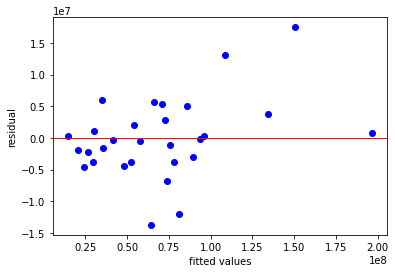

In [63]:
# Residual plot
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [64]:
import scipy as sp
from sklearn.metrics import r2_score

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print('Critical value =',critical_value)
print('Test result =', test_result)
print('R2 Score =',r2_score(y_test,y_pred))

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data
if (test_result > critical_value):
  print('Variances are Unequal, Model is not Satisfactory')
else:
  print('Variances are Homogeneous')

Critical value = 135.65515802771304
Test result = 66.29166718914655
R2 Score = 0.974219422799986
Variances are Homogeneous


### Multiple Linear Regression.

In [65]:
rdf.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long
0,30548537.0,178,79,86542,289017,68,77242,2713.1809,-6971.548
1,12954142.0,84,33,40565,100082,33,35075,1190.7774,-3058.305


In [66]:
# Define X and y

X = rdf.iloc[:,1:-1].values
y = rdf.iloc[:,-1] .values

# Splitting the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [70]:
# Fitting Multiple Linear Regression to the Training set

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Creating a baseline regression model
multiple_linear_model = (mean_squared_error(y_true=y,y_pred=regressor.predict(X)))
print('Multiple Linear model =',multiple_linear_model)
# Regression coefficient
print('Regressor intercept =',regressor.intercept_)
# Regression coeefficient
print('Regressor coefficient =',regressor.coef_)

Multiple Linear model = 71.29489743962816
Regressor intercept = 0.16077949965983862
Regressor coefficient = [-2.16062959e-01  1.86718980e-03  3.84153981e-04 -6.42936854e-06
 -2.19229311e-02 -2.06111045e-04 -2.56111186e+00]


In [71]:
# Predicting the test set.

from sklearn import metrics
print('Mean Absolute Error=', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error=', metrics.mean_squared_error(y_test, y_pred))  


Mean Absolute Error= 69307668.71876927
Mean Squared Error= 6436584408488053.0


In [72]:
# Calculting the  residuals.

residual=np.subtract(y_pred,y_test)
residual.mean()
print(pd.DataFrame(residual).describe())

                  0
count  2.900000e+01
mean   6.930767e+07
std    4.112607e+07
min    1.457207e+07
25%    3.549279e+07
50%    6.600956e+07
75%    8.612713e+07
max    1.967843e+08


Text(0, 0.5, 'Predicted values')

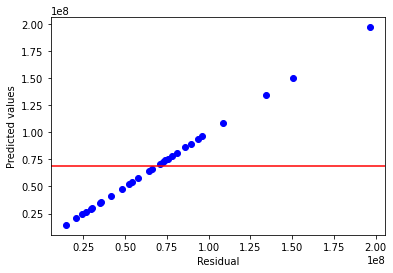

In [73]:
# Plotting the residual plot

plt.scatter(y_pred,residual,color='blue')
plt.axhline(y=residual.mean(),color='red')
plt.xlabel('Residual')
plt.ylabel('Predicted values')

In [74]:
# Heteroskedasticity testing using bartlettess test. 

test,pvalue = sp.stats.bartlett(y_pred, residual)

# Calculating the chi square

ch=len(y_pred)-1
prob=1-pvalue

critical=sp.stats.chi2.ppf(prob,ch)

if test>critical:
  print('Variances are Unequal, Model needs be Reassesment')
else:
  print('Variances are Homogeneous ')

Variances are Homogeneous 


### Ridge Regression.

In [75]:
# Import libraries
from sklearn.linear_model import Ridge
from  sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

ridge=Ridge(normalize=True)
params={'alpha':np.logspace(-5,5,1)}
search=GridSearchCV(estimator=ridge,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,refit=True,cv=10)

# Search for the best paramaters
search.fit(X_train,y_train)
print(search.best_params_)
{'alpha': 0.001}
abs(search.best_score_)

{'alpha': 1e-05}


97.95242532670468

In [77]:
# Fitting the model

ridge=Ridge(normalize=True,alpha=0.00001)

ridge.fit(X_train,y_train)

# Finding the  the predicted values
y_pred=ridge.predict(X_test)
print('Ridge Model=', y_pred)
# Mean Squared  Error for the model
print('Mean Squared Error =',mean_squared_error(y_test,y_pred))
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',RMSE)
print('Ridge Score =',ridge.score(X_test,y_test))
print('R2 Score =',r2_score(y_test,y_pred))

Ridge Model= [-11857.79573001 -15883.2407669  -26882.36103542 -22258.58493278
  -5872.39035084 -38949.86637474 -19898.58057132 -31611.52417655
 -45106.47999799 -31410.59370501  -6972.28899296  -2938.86522674
 -25871.20215782  -8436.83545968 -16496.51775127 -22480.52515684
 -12840.89525065 -13694.09156772 -24566.50238104 -19327.91266676
  -7583.83167048  -5255.68617164 -17250.34810256 -22466.08484585
  -9656.81918853 -16491.71810838 -14653.38448409 -19922.86118216
  -7214.26455792]
Mean Squared Error = 95.64989876641617
Root Mean Squared Error = 9.780076623749743
Ridge Score = 0.9999990564096294
R2 Score = 0.9999990564096293


### Lasso Regression.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


X = df.drop(['price'], axis =1).values
y = df['price'].values

# Standadizing our features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# Creating lasso object

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso,param_grid=params, scoring='neg_mean_squared_error') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 

# Print scores, MSE, and coefficients

print("Lasso Best Parameters =", gridlasso.best_params_) 
print("Lasso Score =", gridlasso.score(X_test, y_test))
print("Lasso MSE =", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("Lasso Best Estimator coef =", gridlasso.best_estimator_.coef_)

Lasso Best Parameters = {'alpha': 1e-05}
Lasso Score = -28722250491443.508
Lasso MSE = 28722250491443.508
Lasso Best Estimator coef = [-9.48168427e+04 -3.09062792e+04 -6.00922634e+04  3.62709107e+02
 -7.64547144e+00  5.14820863e+04  0.00000000e+00  0.00000000e+00
  1.70849271e+04  3.88639225e+04 -1.86545354e+02 -1.17995407e+02
  0.00000000e+00 -1.09749878e+03  4.59086917e+01]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 931694430479741.0, tolerance: 23191726863486.156
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 815504369705462.4, tolerance: 19254890713832.938
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1016326259660810.2, tolerance: 22880659595538.414
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52990878

### Elastic Net Regression.

In [78]:
## Elastic net model
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(normalize=True)
net=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [79]:
# Fitting the model. 
net.fit(X,y)
print(net.best_params_)
abs(net.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5638546.015472347, tolerance: 1486646.087380394
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5754502.802961596, tolerance: 1518439.5503798588
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5720338.075042946, tolerance: 1514151.4905554499
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5900564.97

{'alpha': 1e-05, 'l1_ratio': 0.8}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1928718.239665863, tolerance: 1691191.648902571
  positive)


6523.800758600184

In [80]:
# Fitting Elastic Net.

regr = ElasticNet(random_state=0)
regr.fit(X, y)
elastic_end = (mean_squared_error(y_true=y,y_pred=regr.predict(X)))
print(elastic_end)
print(regr.coef_)
print(regr.intercept_)

1294.1573475684522
[-1.09427891e+00  3.63859784e+00 -3.20931973e-04 -1.03314478e-04
 -3.29010577e+00  4.02603298e-04 -2.50344252e+00]
-11.10925383630456


### Quantile Regression.

In [82]:
# Performing quantile regression.

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.regression.quantile_regression as Q_reg

mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + sqft_above + lat + long', rdf)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.8846
Model:                       QuantReg   Bandwidth:                   3.423e+06
Method:                 Least Squares   Sparsity:                    1.083e+07
Date:                Mon, 22 Feb 2021   No. Observations:                  116
Time:                        09:36:44   Df Residuals:                      107
                                        Df Model:                            8
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.057e+04   1.05e+06      0.010      0.992   -2.07e+06    2.09e+06
bedrooms    -1.355e+05   2.83e+04     -4.793      0.000   -1.92e+05   -7.95e+04
bathrooms   -4.022e+04   6.23e+04     -0.646      0.520   -1.64e+05    8.32e+04
sqft_living   270.2569     63.822      4.235   

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
